In [1]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")

# Creating model object and indicating path
data_path = "../../../../../input/BES/stratbr_grid_v4/gempy_format/"
geo_model = gp.create_model("StratBR_BES_v4")

No module named 'osgeo'


## Step by step

In [2]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[0, 179000, 0, 148000, -17000, 1000],
    resolution=[50, 50, 50],
    path_i=data_path + "surfaces_points_scaled_merged_all_ages_X_and_Y_reduced.csv",
    path_o=data_path + "orientations_points_scaled_one_formation.csv",
)

Active grids: ['regular']


StratBR_BES_v4  2024-01-15 23:44

In [3]:
# Ligando a camada a uma série (ponto de orientação somente para uma formação) do topo para base.
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series": (
            "sf",
            "bes_89",
            "bes_90",
            "bes_91",
            "bes_92",
            "bes_93",
            "bes_94",
            "bes_95",
            "bes_96",
            "bes_97",
            "bes_98",
            "bes_99",
            "bes_100",
        ),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,sf,Strat_Series,1,#015482,1
1,bes_89,Strat_Series,2,#9f0052,2
2,bes_90,Strat_Series,3,#ffbe00,3
3,bes_91,Strat_Series,4,#728f02,4
4,bes_92,Strat_Series,5,#443988,5
5,bes_93,Strat_Series,6,#ff3f20,6
6,bes_94,Strat_Series,7,#5DA629,7
7,bes_95,Strat_Series,8,#4878d0,8
8,bes_96,Strat_Series,9,#ee854a,9
9,bes_97,Strat_Series,10,#6acc64,10


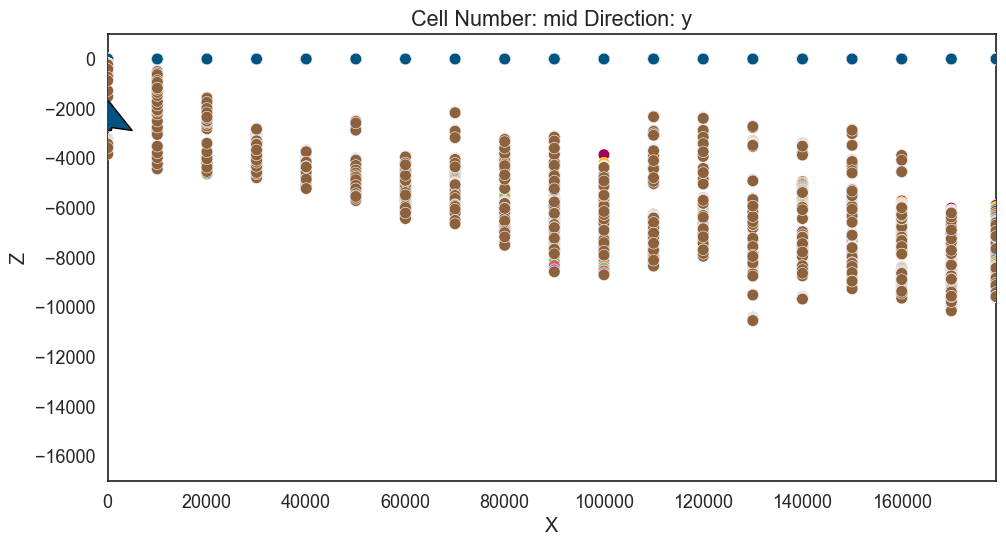

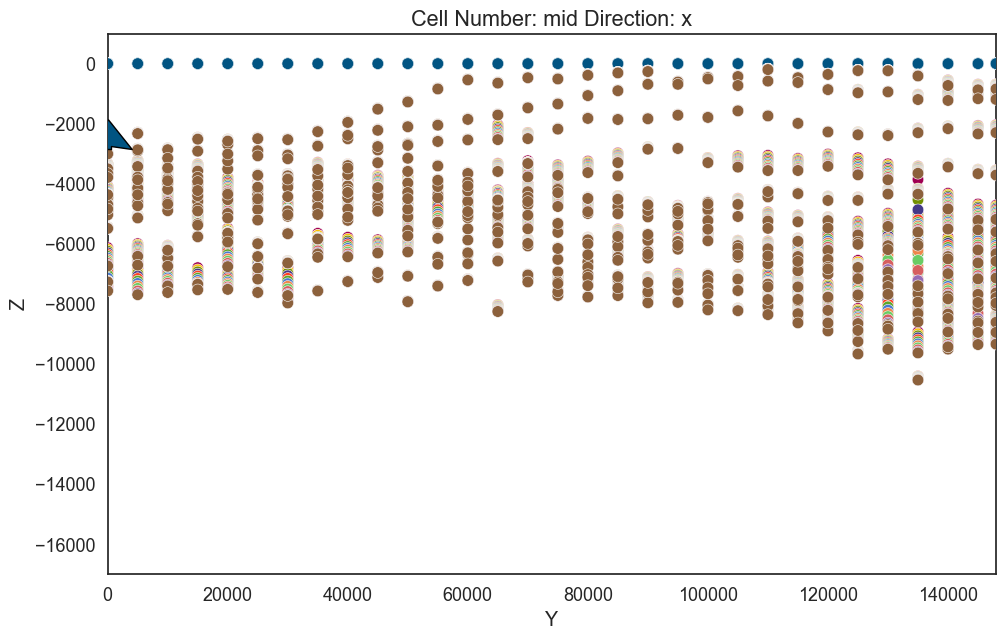

In [4]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=5, legend=False)
gp.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=5, legend=False)
#gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [5]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="basic",
)

In [6]:
%%time
gp.set_interpolator(
    geo_model, 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
)

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                             values
range                232957.077592
$C_o$            1292119047.619047
drift equations             [3, 3]
CPU times: total: 6.61 s
Wall time: 15.9 s


In [7]:
%%time
gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

CPU times: total: 8min 5s
Wall time: 3min 46s



Lithology ids 
  [13.39356474 13.66541237 13.821549   ...  6.31770102  6.34818365
  6.39229965] 

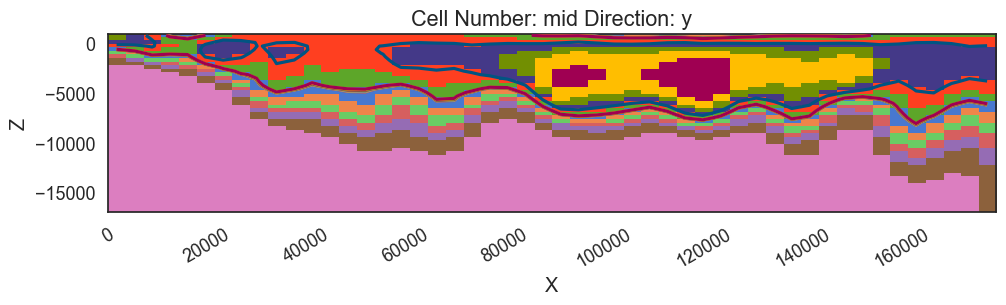

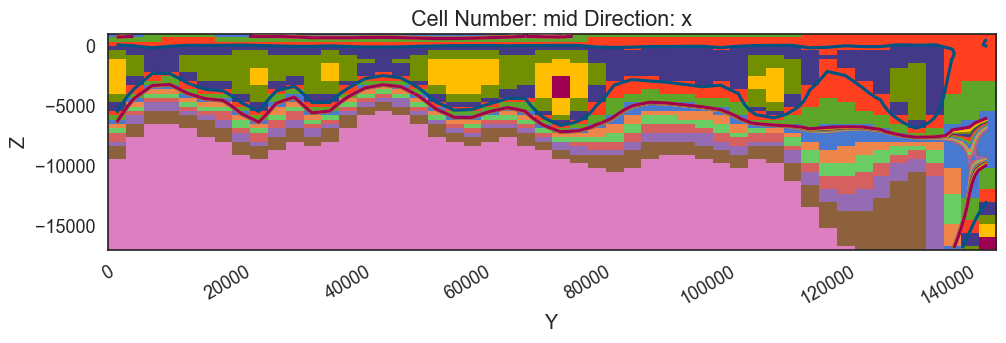

In [8]:
# Seção transversal do modelo Com Z 1000 a -17000
gp.plot_2d(geo_model, direction="y", show_data=False, show_lith=True, ve=2, legend=True)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=2,
    legend=True,
)

In [10]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type="background", show_data=False, ve=1)

In [14]:
topo_init = tp.compute_topology(
    geo_model, direction="x", voxel_threshold=1
)  # , direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 1, topo_init[0], topo_init[1]
)

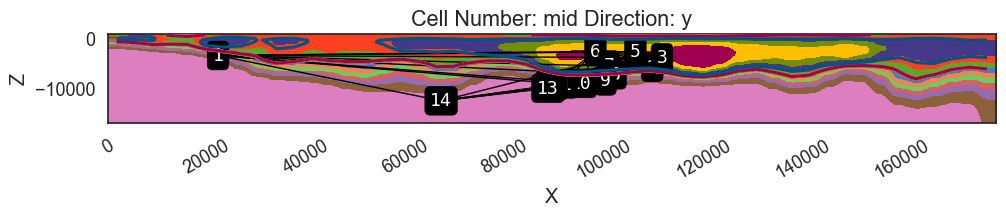

In [15]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)

In [13]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    path="../../../../../output/BES/StartBR/v4/gempy_2.3.1/",
    compress=True,
)

True